# בעיית תרמיל הגב (Knapsack Problem)

בחלק זה נכיר עוד בעיה מוכרת במדעי המחשב, ונממש את הפתרון הרקורסיבי עבורה.

## הגדרת הבעיה

חברת שילוח מנסה למכור במכרז קיבולת של 1000 טון מטען בספינת משא. החברה קיבלה 100 הצעות שונות ממשלחים פוטנציאליים. כל הצעה כוללת: **משקל, ותמורה מוצעת**.   
החברה מעוניינת לבחור תת־קבוצה של הצעות $(m_1, …, m_k)$ כך ש:  
    - סך המשקלים יתאים לקיבולת הספינה  
    - סך התמורות יהיה מקסימלי  

ננסח כעת את הבעיה בצורה יותר פורמלית
- קיבולת השילוח $W$ = 1000  
- מספר ההצעות ממשלחים פוטנציאליים $n$ = 100  
- לכל הצעה $i$:  
    - משקל $w_i$, ותמורה מוצעת $v_i$ (הערך שלה)  
- **המטרה**: למקסם את סך כל התמורות תחת מגבלת הקיבולת $W$  
- **הפלט הרצוי**: סכום הערכים המקסימלי שניתן להכניס לספינת המשא.


```{admonition} **מעניין לדעת!** 
:class: note

הבעיה לעתים קרובות מוצגת גם כבעיה של הכנסת חפצים יקרים לתרמיל גב מוגבל במקום, ומכאן שמה.

```

## פתרון #1: גישה חמדנית (Greedy Approach)
ראשית, נבחן רעיון שנראה אינטואיטיבי: אם נבחר בכל פעם את ההצעה שנותנת הכי הרבה ערך ליחידת משקל, נקבל לכאורה תוצאה טובה במיוחד. 
במילים אחרות:
- נמיין את ההצעות לפי יחס התמורה ליחידת קיבולת: $v_i / w_i$   
- נבחר את ההצעות הגבוהות ביותר לפי סדר המיון עד למילוי הקיבולת.

#### מימוש בפייתון

ממשו את הגישה החמדנית לפתרון בעיית תרמיל הגב.
הניחו ש`offfers` מכיל רשימת הצעות. כל הצעה היא טאפל בו האיבר הראשון הוא ערך ההצעה, והאיבר השני הוא המשקל שלה.
הניחו ש`W` הוא מספר חיובי המייצג את הקיבולת.

In [ ]:
def ks_greedy(offers,W):
    # Write your code here
    pass

W = 10
offers = [(7,7), (4,5), (4,5)]
greedy_reward = ks_greedy(offers,W)
print(greedy_reward)

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

``` python
def ks_greedy(offers,W):
    offers = sorted(offers, key = lambda offer: offer[0]/offer[1], reverse=True) # Sort by v_i/w_i
    weight = 0
    value = 0
    for offer in offers:
        if weight+offer[1] > W: # If can't add the offer, return the value.
            return value
        weight += offer[1]      # If can, add the offer.
        value += offer[0]

```

```{admonition} **עצרו וחישבו:** האם התוצאה שקיבלנו בריצת הדוגמא היא אופטימלית?
:class: dropdown, caution

הגישה החמדנית אמנם אינטואיטביבית, אך זו לא בהכרח הגישה האופטימלית. ייתכן שצירוף של הצעות "פחות משתלמות" בנפרד יניב יחד ערך כולל גבוה יותר.
לדוגמה, בריצת הדוגמא הגישה החמדנית נתנה ערך של 7, אך ניתן לקחת את שתי ההצעות שמשקלן 5 ולקבל ערך גבוה יותר של 8.

```

## פתרון #2: גישה רקורסיבית

כעת נממש את הגישה הרקורסיבית ל־**Knapsack Problem**, אשר כן תמצא פתרון אופטימלי. 
הגישה הזו היא דרך חשיבה שונה מהפתרונות שעשינו עד כה, והיא טכניקה מאוד שימושית - **חלוקה למקרים**. 

#### דוגמת הרצה

הבעיה בה נתקלנו בגישה החמדנית הייתה **שלא בדקנו את כל האפשרויות**.
בואו כעת נסתכל על הדוגמא שלנו, ונבדוק מה יהיה סך המשקל והתמורה של כל אחת מהאפשרויות.

המקרה שלנו:
$W = 10, \{(v_i,w_i)\} = \{(7,7),(4,5),(4,5)\}$

**האפשרויות:**

<span style='color:blue'>כחול:</span> נלקח, <span style='color:orange'>צהוב:</span> לא נלקח

צירוף 1: <span style='color:orange'> $(7,7),(4,5),(4,5)$ </span> $\Longrightarrow$ <span style='color:green'>רלוונטי:</span> (סך משקל $=0$, תמורה $=0$)

צירוף 2: <span style='color:blue'> $(7,7),$ </span> <span style='color:orange'> $(4,5),(4,5)$ </span> $\Longrightarrow$ <span style='color:green'>רלוונטי:</span> (סך משקל $=7$, תמורה $=7$)

צירוף 3: <span style='color:orange'> $(7,7),$ </span> <span style='color:blue'> $(4,5),$ </span> <span style='color:orange'> $(4,5)$ </span> $\Longrightarrow$ <span style='color:green'>רלוונטי:</span> (סך משקל $=5$, תמורה $=4$)

צירוף 4: <span style='color:blue'> $(7,7),(4,5),$ </span> <span style='color:orange'> $(4,5)$ </span> $\Longrightarrow$ <span style='color:red'>לא רלוונטי:</span> (סך משקל $=12$, תמורה $=11$)

צירוף 5: <span style='color:orange'> $(7,7),(4,5),$ </span> <span style='color:blue'> $(4,5)$ </span> $\Longrightarrow$ <span style='color:green'>רלוונטי:</span> (סך משקל $=5$, תמורה $=4$)

צירוף 6: <span style='color:blue'> $(7,7),$ </span> <span style='color:orange'> $(4,5),$ </span> <span style='color:blue'> $(4,5)$ </span> $\Longrightarrow$ <span style='color:red'>לא רלוונטי:</span> (סך משקל $=12$, תמורה $=11$)

צירוף 7: <span style='color:orange'> $(7,7),$ </span> <span style='color:blue'> $(4,5),(4,5)$ </span> $\Longrightarrow$ <span style='color:green'>רלוונטי:</span> (סך משקל $=10$, תמורה $=8$) $\}\Longrightarrow$ מקסימום

צירוף 8: <span style='color:blue'> $(7,7),(4,5),(4,5)$ </span> $\Longrightarrow$ <span style='color:red'>לא רלוונטי:</span> (סך משקל $=17$, תמורה $=15$)


כך ניתן לראות שמבין כל האפשרויות הרלוונטיות (שלא חורגות ממשקל 10), צירוף 7 נותן לנו את התמורה המקסימלית שהיא 8.

### דרך הסתכלות נוספת - חלוקה למקרים
כעת, נחלק את כל האפשרויות בצורה שתעזור לנו להגיע לפתרון.

בכל פעם, נסתכל על הצעה אחת (לדוגמא, $(4,5)$), ונחלק את הצירופים האפשריים לשניים:  
- תת־קבוצה 1: צירופים של הצעות שלא כוללים את ההצעה: $\{$<span style='color:grey'> $(7,7),(4,5),$ </span> <span style='color:orange'> $(4,5)$ </span> $\}$  
- תת־קבוצה 2: צירופים של הצעות שכן כוללים את ההצעה:  $\{$<span style='color:grey'> $(7,7),(4,5),$ </span> <span style='color:blue'> $(4,5)$ </span> $\}$  

עבור כל תת־קבוצה כזו, החלטנו כבר לגבי ההצעה $(4,5)$, ולכן המשימה הופכת ל**פשוטה יותר בפריט אחד**. וכך ממשיכים את התהליך הזה **באופן רקורסיבי** עבור כל תת־קבוצה של צירופים.  
- בתת-קבוצה 1: מאחר שאנחנו יודעים שלא כללנו את הפריט $(4,5)$, המשקל לא השתנה, אבל יש לנו **פריט אחד פחות**.  
- בתת-קבוצה 2: מאחר שכללנו את הפריט, ניתן להמשיך לפתור את הבעיה עבור שאר הפריטים. מאחר שהפריט נכנס למשקל, נצטרך לבדוק את שאר הפריטים עבור קיבולת קטנה יותר. כלומר במקרה הזה יש לנו **קיבולת קטנה יותר וגם פריט אחד פחות**.

#### לסיכום

בכל שלב נרצה לבחור פריט מסוים ולבדוק:

1. **מה הערך המקסימלי אם נכניס את הפריט לתרמיל?**  
   - נוסיף את הערך שלו ($v_i$).  
   - נמשיך לפתור את הבעיה עבור שאר הפריטים עם קיבולת מופחתת ($W - w_i$).  

2. **מה הערך המקסימלי אם לא נכניס את הפריט לתרמיל?**  
   - לא נוסיף את הערך שלו.  
   - נמשיך לפתור את הבעיה עבור שאר הפריטים עם אותה קיבולת $W$.  

בסופו של דבר, הפתרון הזה מאפשר לנו מעבר ובדיקה של כל הצירופים הרלוונטיים של ההצעות באופן רקורסיבי, ובחירת הצירוף שממקסם את התמורה, תוך שמירה על מגבלת המשקל.

#### הנוסחה הרקורסיבית:

$$
\text{Knapsack}(n, W) = 
\begin{cases} 
0 & \text{if } n=0 \text{ or } W=0 \\[6pt]
\text{Knapsack}(n-1, W) & \text{if } w_n > W \\[6pt]
\max \big( v_n + \text{Knapsack}(n-1, W-w_n), \; \text{Knapsack}(n-1, W) \big) & \text{otherwise}
\end{cases}
$$


### מימוש פונקציית העזר הרקורסיבית

ננסה כעת לממש יחדיו את הפתרון, צעד אחד צעד. 

נתחיל מהגדרת הקלט והפלט של הפונקציה הרקורסיבית $KS(i, j)$:  

קלט:
- $j$ מייצג את הקיבולת הנוכחית של הספינה.  
- $i$ הוא האינדקס של של ההצעה עבורה **יש לקבל החלטה**.  
    - מניחים שכבר התקבלה החלטה עבור כל האינדקסים **הגדולים** מ$i$.  

פלט:
- $KS(i, j)$ מחזירה את התמורה המקסימלית שניתן לקבל, בהינתן $i$ ו־$j$.  

נסתכל כעת על ההצעה ה-i:

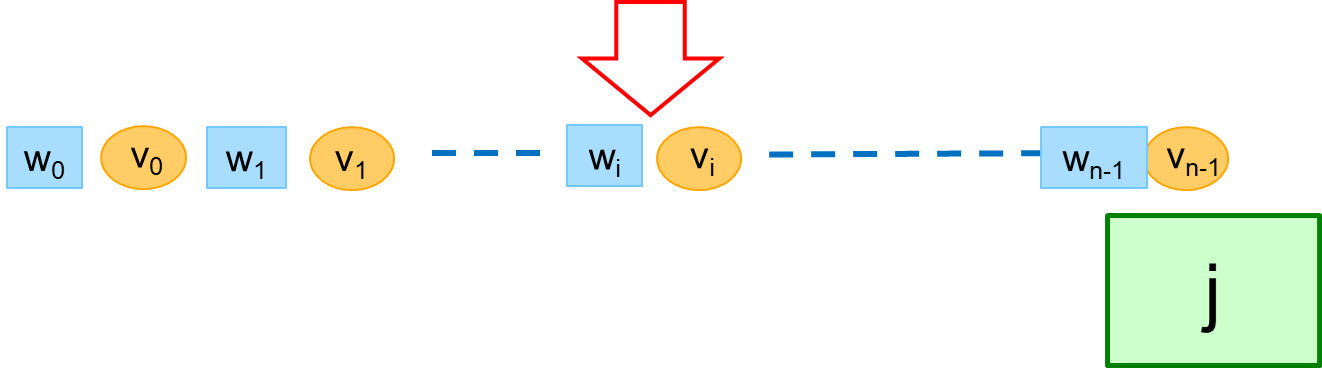

```{admonition} **הבחנה חשובה**
:class: note

אם $w_i$ חורגת מהקיבולת $j$, לא צריך לבדוק את האפשרות שבה אנחנו לוקחים את ההצעה ה-i. המקרה הזה גם ככה לא ייתן פתרון לבעיה.

```

נפרק כעת את הפתרון שלנו לפי שלושת החלקים של רקורסיה: **מקרה בסיס, פירוק והרכבה**

#### מקרה הבסיס
אנחנו יודעים שאם הקיבולת היא 0 (התיק התמלא), או אם נגמרו ההצעות, לא נוכל להכניס ערך נוסף.

```python
if j == 0: return 0   # no more capacity on the ship
if i == -1: return 0   # no more offers
```

#### פירוק הבעיה לתתי-בעיות
קיימות שתי אפשרויות לפירוק עבור הצעה מסוימת.

אם התוספת של ההצעה הנוכחית גורמת לחריגה של המטען הכולל מהקיבולת (`w_i > j`), אנו נדלג על ההצעה בודאות.  

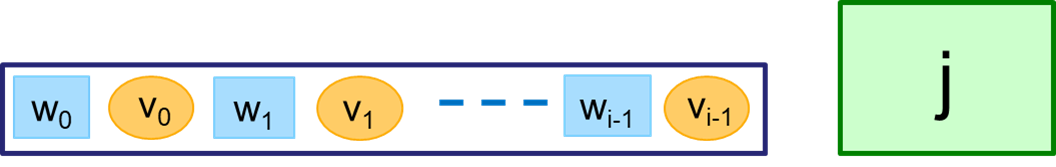 



לעומת זאת, אם התוספת של ההצעה הנוכחית אינה גורמת לחריגה של המטען הכולל מהקיבולת (`w_i ≤ j`), נפרק את הבעיה לשתי האפשרויות הבאות:

1.  לדלג על ההצעה (כמו מקודם)

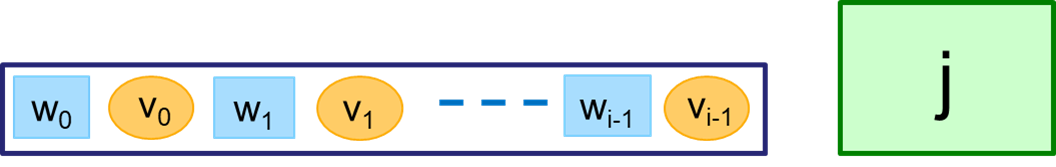 


 2. לקחת את ההצעה

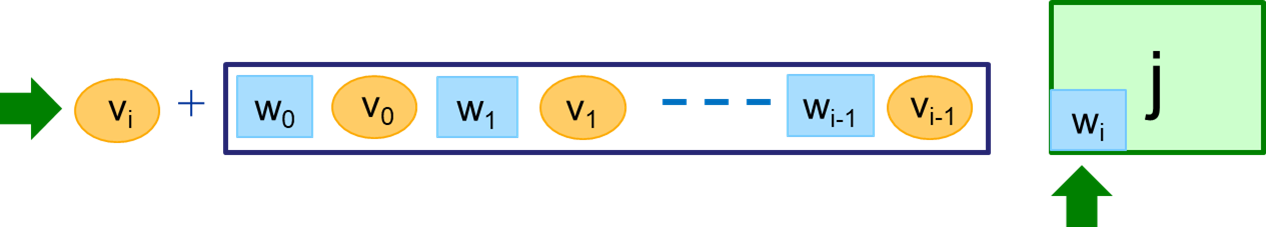


כעת נרכיב את תתי הבעיות יחד:
- אם התוספת של ההצעה הנוכחית גורמת לחריגה של המטען הכולל מהקיבולת (`w_i > j`), ישנה רק תת-בעיה אחת (רק אפשרות לדלג על ההצעה הנוכחית), ולכן נחזיר פשוט את ערכה
- אם התוספת של ההצעה הנוכחית גורמת לחריגה של המטען הכולל מהקיבולת (`w_i <= j`), ניקח את **הערך המקסימלי** מבין 2 אופציות (לדלג או לקבל את ההצעה הנוכחית).

בניסוח מתמטי פורמלי, נוסחת הKnapsack נראית כך:

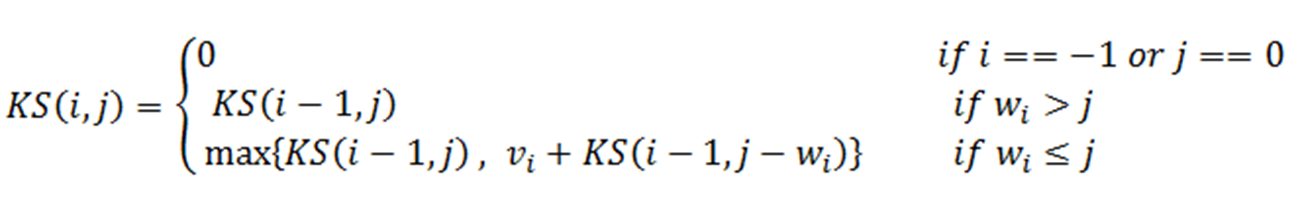


#### מימוש הפתרון בפייתון

```{admonition} **שימו לב** 
:class: error

הפתרון שלנו כלל **פונקציית עזר רקורסיבית**. מאחר שהבעיה המקורית לא כללה את הפרמטרים `i` ו`j`.
לבסוף, בנינו פונקציה לפי הפרמטרים של הבעיה (`ks_rec`) אשר **קוראת** לפונקציה הרקורסיבית שלנו.  
במהלך הקורס, כאשר אנחנו מבקשים פתרון רקורסיבי, ניתן ליצור פונקציית עזר. עם זאת, הפתרון תמיד חייב להיות רקורסיבי.

```

In [ ]:
def ks_rec_helper(offers,i,j):
    if i==-1 or j==0: # End cases
        return 0
        
    v_i = offers[i][0]
    w_i = offers[i][1]
    
    if w_i > j:
        return ks_rec_helper(offers,i-1,j)
    else:
        return max(ks_rec_helper(offers,i-1,j), v_i+ks_rec_helper(offers,i-1,j-w_i))

def ks_rec(offers,W):
    return ks_rec_helper(offers,len(offers)-1,W)

In [ ]:
W = 10
offers = [(7,7), (4,5), (4,5)]
best_reward = ks_rec(offers,W)
print(best_reward)